In [2]:
import matplotlib.pyplot as plt
import fingerprint

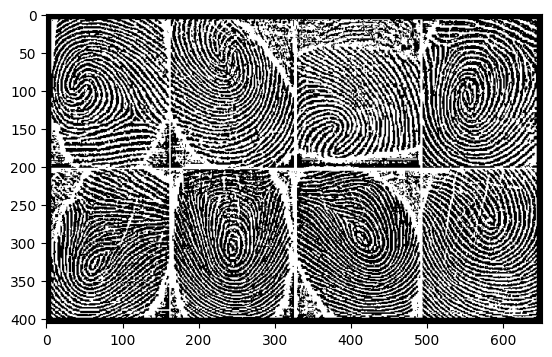

In [3]:
# note: this can take a while to run
BnW_image = fingerprint.BinarizeFingerprint("images/fingers.png", method='Pixel Blocks', blockSize=15)

plt.imshow(BnW_image, cmap='gray')
plt.show()